In [1]:
# step - 1. Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# step - 2. Reading the data

df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# for info
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# step - 3. Selecting features for regression

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [5]:
# step - 4. Spliting the data

msk = np.random.rand(len(cdf)) < 0.80

train = cdf[msk]
test = cdf[~msk]

In [6]:
# info
train.shape

(837, 4)

In [7]:
# info
test.shape

(230, 4)

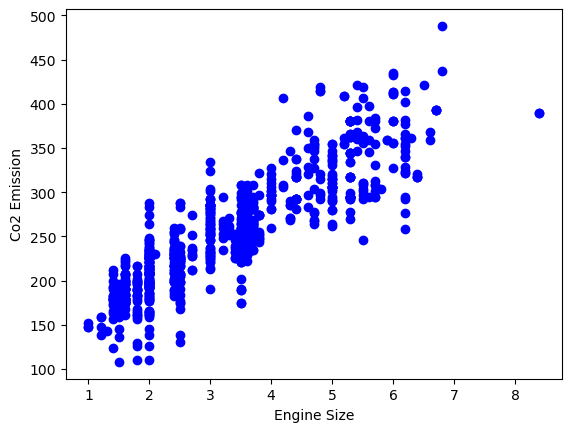

In [8]:
# info
# plotting graph - train data distrubution

plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

In [9]:
# step - 5. Multiple regression model

from sklearn import linear_model   # importing

regr = linear_model.LinearRegression() # model

x = np.asanyarray(train[["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_COMB"]])   # indepent variable
y = np.asanyarray(train[["CO2EMISSIONS"]])                                     # dependent variable

regr.fit(x,y)  # training fun que+ans

print('intercept: ',regr.intercept_)   # intercept
print('coefficient: ',regr.coef_)   # coefficient

intercept:  [67.26449786]
coefficient:  [[10.81099831  7.52375248  9.41718513]]


In [10]:
# step - 6. Prediction

from sklearn.metrics import r2_score


x_test = test[["ENGINESIZE","CYLINDERS", "FUELCONSUMPTION_COMB"]] 
y_test = test[["CO2EMISSIONS"]] # this is actual ans

In [11]:
# step - 7. converting into array

y_test = np.asanyarray(y_test)

In [12]:
# step - 7
# y_hat is calculated ans of x_test

y_hat = regr.predict(x_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [13]:
# step - 8 Residual sum of square

print(f"Residual sum of square: %.2f" % np.mean((y_hat - y_test)**2))

Residual sum of square: 593.86


In [14]:
# step - 9. R2 score

print(f"R2-score: {r2_score(y_hat , y_test)}")

R2-score: 0.8101676212579852


In [15]:
accuracy = r2_score(y_hat , y_test)

In [16]:
accuracy

0.8101676212579852

In [17]:
EngineSize = float(input("Enter the Engine Size : "))
Cylinders = float(input("Enter the Cylinder Size : "))
FCC = float(input("Enter the FCC : "))
print(f"Output is : {regr.predict([[EngineSize,Cylinders,FCC]])} with {accuracy * 100} am saying this")

Enter the Engine Size : 3.5
Enter the Cylinder Size : 6
Enter the FCC : 11
Output is : [[253.83454322]] with 81.01676212579852 am saying this


In [18]:
print(" %.2f" %(accuracy*100))

 81.02
